In [1]:
from jyrobot.world import World
from jyrobot import config
from jyrobot.canvas import Canvas
import math

from ipylab import JupyterFrontEnd, Panel
from ipywidgets import Layout

In [2]:
def get_canvas(config, width, height, scale=1.0):
    config["width"] = round(width * scale)
    config["height"] = round(height * scale)

    canvas = Canvas(config["width"], config["height"])
    canvas.gc.scale(scale, scale)
    canvas.gc.layout = Layout(width='%spx' % config["width"])
    return canvas

In [3]:
canvas = get_canvas(config, 500, 250, 1.75)

In [4]:
app = JupyterFrontEnd()

panel = None
for widget in app.shell.widgets.values():
    if hasattr(widget, "title") and widget.title.label == "Jyrobot Simulator":
        #panel = widget
        break
        
if panel is None:
    panel = Panel()
    panel.children = [canvas.gc]
    panel.title.label = "Jyrobot Simulator" 
    app.shell.add(panel, 'main', {'mode': 'split-right'})
else:
    panel.children = [canvas.gc]



In [5]:
world = World(config, canvas)

In [10]:
world.reset()

In [11]:
world.robots[0].vx = 1.0
world.robots[0].va = math.pi/40

In [12]:
world.update()

In [9]:
%%time
world.seconds(20.0)

CPU times: user 1.5 s, sys: 18.5 ms, total: 1.52 s
Wall time: 1.5 s


In [13]:
%%time
world.seconds(20.0, show=False)

CPU times: user 465 ms, sys: 3.03 ms, total: 468 ms
Wall time: 466 ms


In [12]:
world.robots[0].vx = -1.0
world.robots[0].va = 0

In [14]:
world.update()

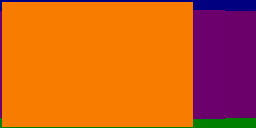

In [15]:
world.robots[0].cameras[0].takePicture()

In [16]:
world.robots[0].cameras[0].set_size(500, 250)
world.robots[0].cameras[0].set_angle(180)
world.robots[0].cameras[0].set_depth(1.0)

CPU times: user 8 µs, sys: 3 µs, total: 11 µs
Wall time: 20.3 µs


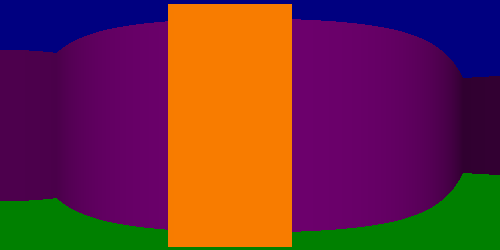

In [17]:
%time
world.robots[0].cameras[0].takePicture()

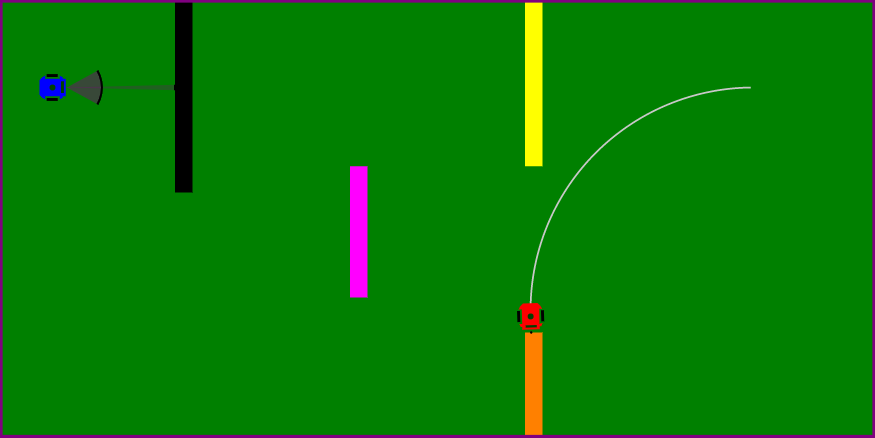

In [17]:
canvas.takePicture()